# EXPLORATORY DATA ANALYSIS--

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import os
import sys

In [2]:
df=pd.read_csv("C:\\Users\\Gaurav Pathak\\Downloads\\TSLA.CSV")

In [3]:
import pandas_datareader as pdr
from datetime import datetime

In [4]:
df["Date"]=pd.to_datetime(df["Date"])

In [5]:
df=df.set_index("Date")

In [6]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


<AxesSubplot: xlabel='Date'>

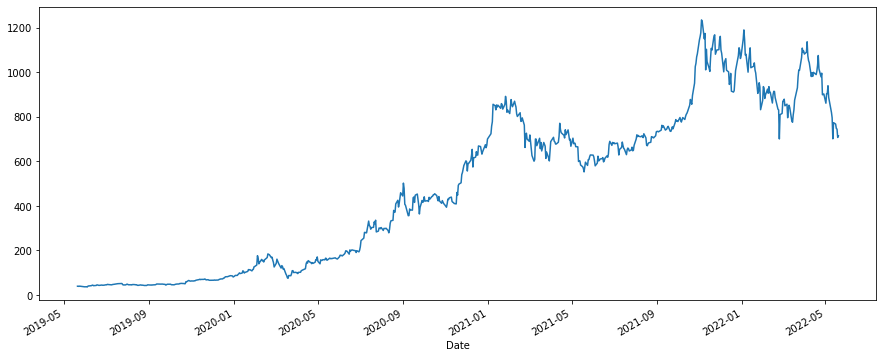

In [7]:
#simple moving average--
df["Open"].plot(figsize=(15,6))

In [8]:
df["Open: 10 days rolling"]=df["Open"].rolling(window=10,min_periods=1).mean()

In [9]:
df["Open: 30 days rolling"]=df["Open"].rolling(window=30,min_periods=1).mean()
df["Open: 50 days rolling"]=df["Open"].rolling(window=50,min_periods=1).mean()

<AxesSubplot: xlabel='Date'>

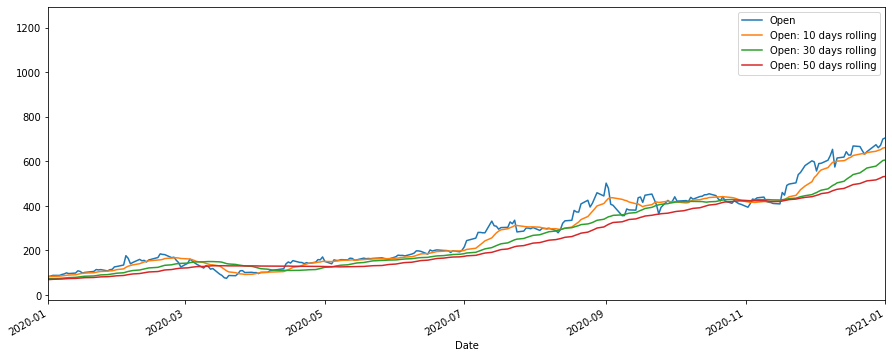

In [10]:
df[["Open","Open: 10 days rolling","Open: 30 days rolling","Open: 50 days rolling"]].plot(xlim=["2020-01-01","2021-01-01"],figsize=(15,6))

<AxesSubplot: xlabel='Date'>

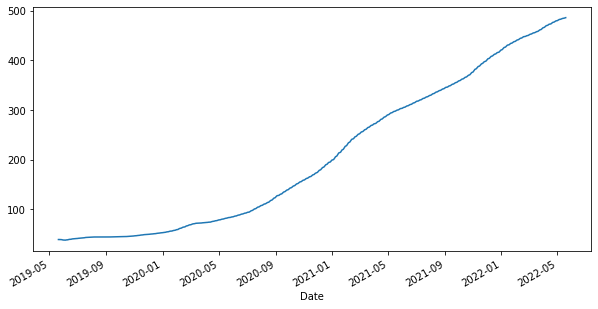

In [11]:
#CMA
df["Open"].expanding().mean().plot(figsize=(10,5))

In [12]:
#ewa
df["Ema_01"]=df["Open"].ewm(alpha=0.1,adjust=False).mean()

<AxesSubplot: xlabel='Date'>

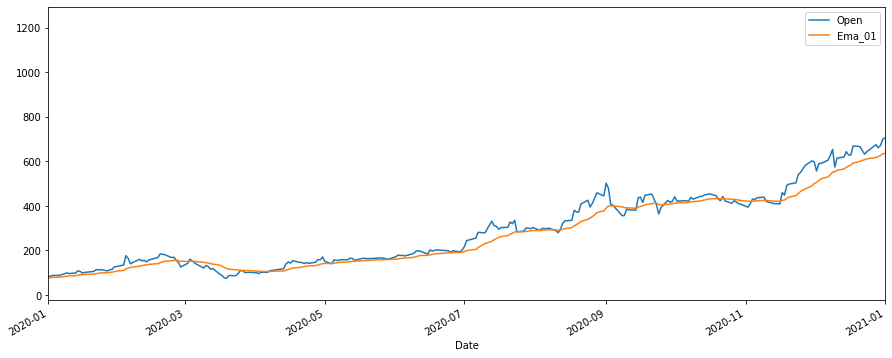

In [13]:
df[["Open","Ema_01"]].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

<AxesSubplot: xlabel='Date'>

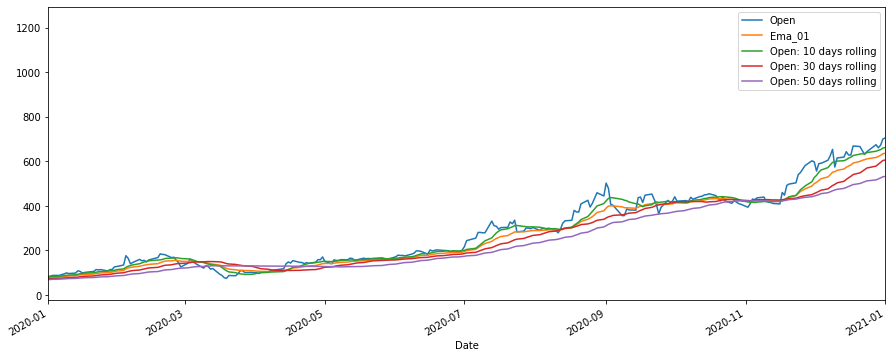

In [14]:
df[["Open","Ema_01","Open: 10 days rolling","Open: 30 days rolling","Open: 50 days rolling"]].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

<AxesSubplot: xlabel='Date'>

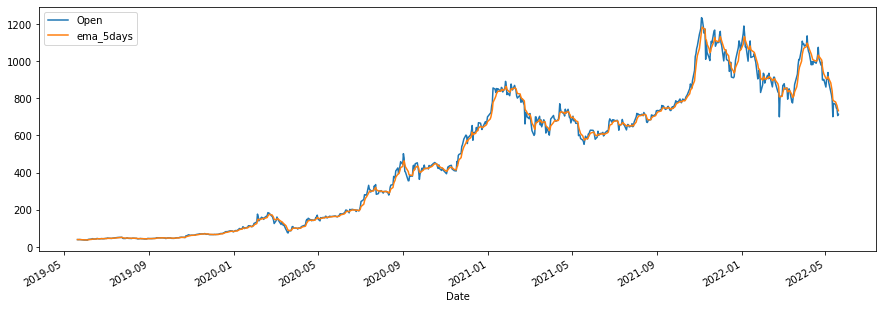

In [15]:
# EXPONENTIAL MOVING AVERAGE
df["ema_5days"]=df["Open"].ewm(span=5).mean()
df[["Open","ema_5days"]].plot(figsize=(15,5))

<AxesSubplot: xlabel='Date'>

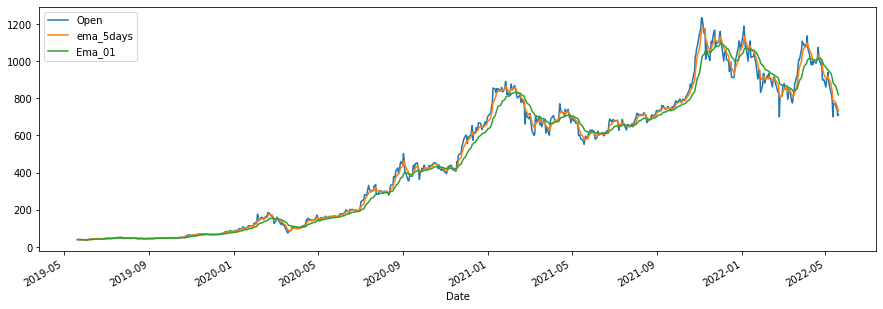

In [16]:
df[["Open","ema_5days","Ema_01"]].plot(figsize=(15,5))

In [17]:
df_airline=pd.read_csv("C:\\Users\\Gaurav Pathak\\Downloads\\airline_passengers.csv")

In [18]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [19]:
import statsmodels.api as sms

In [20]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [21]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [22]:
df_airline.dropna(axis=0,inplace=True)

In [23]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [24]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [25]:
df_airline["Month"]=pd.to_datetime(df_airline["Month"])

In [26]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [27]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [28]:
df_airline.set_index("Month",inplace=True)

In [29]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot: xlabel='Month'>

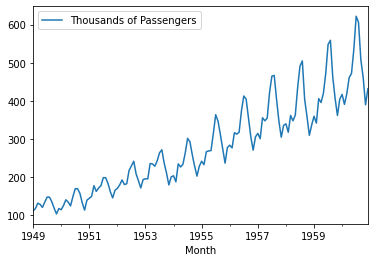

In [30]:
df_airline.plot()

In [31]:
#importing dickey fuller test 
from statsmodels.tsa.stattools import adfuller

In [32]:
def adf_test(series):
    result=adfuller(series)
    print("ADF statistics: {}".format(result[0]))
    print("P-value : {}".format(result[1]))
    if result[1]<=0.05:
        print("strong evidence against the null hypothesis,reject the null hypothesis.Data has no unit root and is stationary")
    else:
        print("weak evidence against the null hypothesis,accept the null hypothesis, indicating it is non-stationary")

In [33]:
adf_test(df_airline["Thousands of Passengers"])

ADF statistics: 0.8153688792060502
P-value : 0.991880243437641
weak evidence against the null hypothesis,accept the null hypothesis, indicating it is non-stationary


In [34]:
# we have to make it stationary.for this we have to differencing
df_airline["passengers first difference"]=df_airline["Thousands of Passengers"]-df_airline["Thousands of Passengers"].shift(1)

In [35]:
df_airline.head()

,Thousands of Passengers,passengers first difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [36]:
adf_test(df_airline["passengers first difference"].dropna())

ADF statistics: -2.829266824170006
P-value : 0.05421329028382468
weak evidence against the null hypothesis,accept the null hypothesis, indicating it is non-stationary


In [37]:
# agian we have to perform differncing for getting stationary data
df_airline["passengers second differencing"]=df_airline["passengers first difference"]-df_airline["passengers first difference"].shift(1)

In [38]:
df_airline.head()

,Thousands of Passengers,passengers first difference,passengers second differencing
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0


In [39]:
adf_test(df_airline["passengers second differencing"].dropna())

ADF statistics: -16.384231542468527
P-value : 2.732891850014085e-29
strong evidence against the null hypothesis,reject the null hypothesis.Data has no unit root and is stationary


In [40]:
#seasonal differencing--
df_airline["passengers 12 diffrence"]=df_airline["Thousands of Passengers"]-df_airline["Thousands of Passengers"].shift(12)

In [41]:
df_airline.head(13)

,Thousands of Passengers,passengers first difference,passengers second differencing,passengers 12 diffrence
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
1949-06-01,135.0,14.0,22.0,NaN
1949-07-01,148.0,13.0,-1.0,NaN
1949-08-01,148.0,0.0,-13.0,NaN
1949-09-01,136.0,-12.0,-12.0,NaN


In [42]:
adf_test(df_airline["passengers 12 diffrence"].dropna())

ADF statistics: -3.3830207264924805
P-value : 0.011551493085514982
strong evidence against the null hypothesis,reject the null hypothesis.Data has no unit root and is stationary


In [43]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

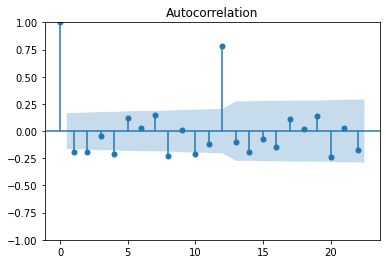

In [44]:
acf=plot_acf(df_airline["passengers second differencing"].dropna())

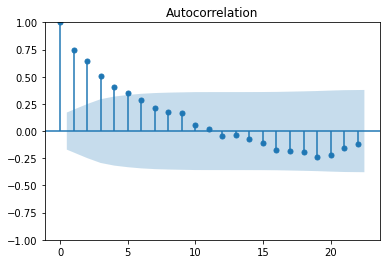

In [45]:
acf12=plot_acf(df_airline["passengers 12 diffrence"].dropna())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


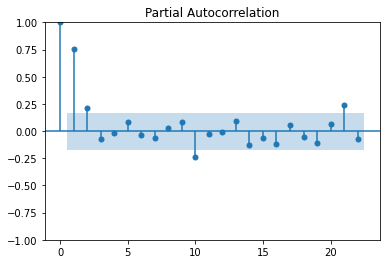

In [46]:
pacf12=plot_pacf(df_airline["passengers 12 diffrence"].dropna())

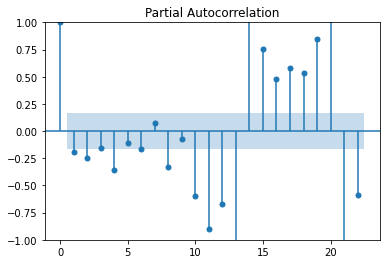

In [47]:
pacf=plot_pacf(df_airline["passengers second differencing"].dropna())

# Forecasting---

In [72]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [73]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [74]:
# prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [79]:
# Create a ARIMA MODEL
from statsmodels.tsa.arima.model import ARIMA

In [80]:
train_data



,Thousands of Passengers,passengers first difference,passengers second differencing,passengers 12 diffrence
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [324]:
model_arima=ARIMA(train_data["Thousands of Passengers"],order=(18,2,0))

2024-03-17 12:26:01,733 [48212] WARNING  py.warnings:109: [JupyterRequire] C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)

2024-03-17 12:26:01,738 [48212] WARNING  py.warnings:109: [JupyterRequire] C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)

2024-03-17 12:26:01,745 [48212] WARNING  py.warnings:109: [JupyterRequire] C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



In [325]:
model_arima_fit=model_arima.fit()

2024-03-17 12:26:02,026 [48212] WARNING  py.warnings:109: [JupyterRequire] C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'

2024-03-17 12:26:04,447 [48212] WARNING  py.warnings:109: [JupyterRequire] C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



In [326]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(18, 2, 0)   Log Likelihood                -305.650
Date:                     Sun, 17 Mar 2024   AIC                            649.300
Time:                             12:26:04   BIC                            695.027
Sample:                         01-01-1949   HQIC                           667.659
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1142      0.160     -6.948      0.000      -1.428      -0.800
ar.L2         -1.1903      0.235     -5.059      0.000      -1.651      -0.729
ar.L3         -1.3978      0.304     -4.603      0.000      -1.993      -0.803
ar.L4         -1.5431      0.427     -3.615      0.000      -2.380      -0.706
ar.L5         -1.4855      0.524     -2.832      0.005      -2.513      -0.458
ar.L6         -1.5369      0.571     -2.693      0.007      -2.655      -0.418
ar.L7         -1.5868      0.613     -2.587      0.010      -2.789      -0.385
ar.L8         -1.7300      0.628     -2.753      0.006      -2.961      -0.499
ar.L9         -1.6129      0.637     -2.534      0.011      -2.861      -0.365
ar.L10        -1.7001      0.623     -2.727      0.006      -2.922      -0.478
ar.L11        -1.5592      0.658     -2.368      0.018      -2.850      -0.269
ar.L12        -0.7743      0.653     -1.185      0.236      -2.055       0.506
ar.L13        -0.5104      0.607     -0.840      0.401      -1.701       0.680
ar.L14        -0.5519      0.573     -0.963      0.335      -1.675       0.571
ar.L15        -0.2484      0.503     -0.494      0.621      -1.234       0.737
ar.L16        -0.1801      0.353     -0.510      0.610      -0.873       0.512
ar.L17        -0.1362      0.340     -0.401      0.688      -0.802       0.530
ar.L18        -0.1493      0.203     -0.736      0.462      -0.547       0.248
sigma2        88.4464     22.573      3.918      0.000      44.205     132.688
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.02
Prob(Q):                              0.96   Prob(JB):                         0.36
Heteroskedasticity (H):               2.07   Skew:                             0.38
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [327]:
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [328]:
pred=model_arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data["Thousands of Passengers"]-pred

In [329]:
residuals

Month
1956-01-01     -5.526290
1956-02-01     -5.636986
1956-03-01     11.001631
1956-04-01      0.718665
1956-05-01      2.154641
1956-06-01     11.204529
1956-07-01      5.520355
1956-08-01     16.836397
1956-09-01     -0.269296
1956-10-01    -15.346369
1956-11-01    -19.890496
1956-12-01    -18.547197
1957-01-01    -24.119592
1957-02-01    -26.559915
1957-03-01      8.201482
1957-04-01     -7.824890
1957-05-01     -7.801408
1957-06-01     14.918109
1957-07-01     14.181005
1957-08-01     37.160714
1957-09-01      4.904293
1957-10-01    -22.632790
1957-11-01    -37.989850
1957-12-01    -36.243004
1958-01-01    -47.014663
1958-02-01    -55.960539
1958-03-01    -26.928155
1958-04-01    -52.701309
1958-05-01    -45.724075
1958-06-01    -17.256058
1958-07-01     -2.050576
1958-08-01     32.454526
1958-09-01    -38.419163
1958-10-01    -59.186258
1958-11-01    -84.496483
1958-12-01    -83.044821
1959-01-01    -74.471441
1959-02-01    -78.183259
1959-03-01    -24.976703
1959-04-01    -49.4

<AxesSubplot: ylabel='Density'>

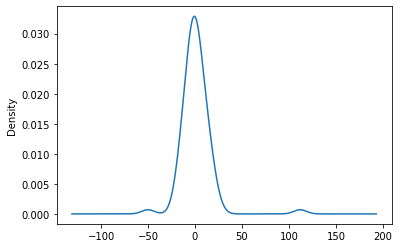

In [330]:
model_arima_fit.resid.plot(kind="kde")

In [331]:
test_data["pred_ARIMA"]=pred

2024-03-17 12:26:05,175 [48212] WARNING  py.warnings:109: [JupyterRequire] C:\Users\Gaurav Pathak\AppData\Local\Temp\ipykernel_48212\356556466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["pred_ARIMA"]=pred



<AxesSubplot: xlabel='Month'>

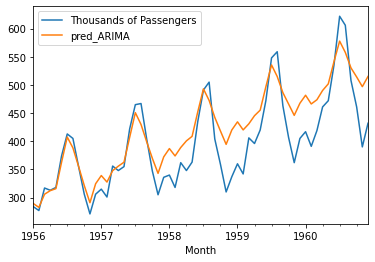

In [332]:
test_data[["Thousands of Passengers","pred_ARIMA"]].plot()

# SARIMAX

In [333]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [342]:
model_sarima=SARIMAX(train_data["Thousands of Passengers"],ored=(3,0,6),seasonal_order=(0,1,0,12))

2024-03-17 12:29:01,260 [48212] WARNING  py.warnings:109: [JupyterRequire] C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)

2024-03-17 12:29:01,267 [48212] WARNING  py.warnings:109: [JupyterRequire] C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



In [343]:
model_sarima_fit=model_sarima.fit()

In [344]:
model_sarima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:            Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -270.998
Date:                            Sun, 17 Mar 2024   AIC                            545.996
Time:                                    12:29:04   BIC                            550.550
Sample:                                01-01-1949   HQIC                           547.809
                                     - 12-01-1955                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9438      0.041     23.194      0.000       0.864       1.024
sigma2       105.5656     17.201      6.137      0.000      71.852     139.280
===================================================================================
Ljung-Box (L1) (Q):                   4.52   Jarque-Bera (JB):                 1.41
Prob(Q):                              0.03   Prob(JB):                         0.50
Heteroskedasticity (H):               1.82   Skew:                             0.34
Prob(H) (two-sided):                  0.15   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [345]:
sarima_pred=model_sarima_fit.predict(start=pred_start_date,end=pred_end_date)
sarima_residuals=test_data["Thousands of Passengers"]-sarima_pred

In [346]:
sarima_residuals

Month
1956-01-01     -4.245386
1956-02-01      0.354373
1956-03-01      8.807983
1956-04-01      5.123659
1956-05-01     11.309155
1956-06-01     24.371790
1956-07-01     16.318471
1956-08-01     27.155716
1956-09-01     13.889678
1956-10-01      4.526161
1956-11-01      8.070648
1956-12-01      3.528308
1957-01-01      3.658638
1957-02-01      2.556775
1957-03-01     27.235772
1957-04-01     20.707948
1957-05-01     29.984930
1957-06-01     55.077691
1957-07-01     51.996587
1957-08-01     73.751394
1957-09-01     48.351334
1957-10-01     31.805114
1957-11-01     29.120951
1957-12-01     21.306600
1958-01-01     17.123993
1958-02-01      8.670569
1958-03-01     22.961551
1958-04-01     11.011309
1958-05-01     28.833403
1958-06-01     59.440632
1958-07-01     69.845075
1958-08-01    104.058132
1958-09-01     41.090561
1958-10-01     36.952517
1958-11-01     27.653584
1958-12-01     16.202806
1959-01-01     31.363334
1959-02-01     27.233755
1959-03-01     61.830376
1959-04-01     54.1

<AxesSubplot: xlabel='Month'>

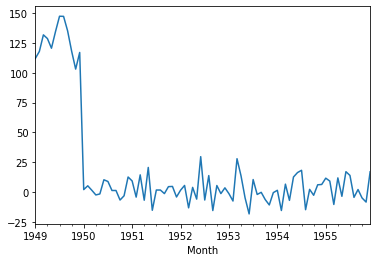

In [350]:
model_sarima_fit.resid.plot()

<AxesSubplot: ylabel='Density'>

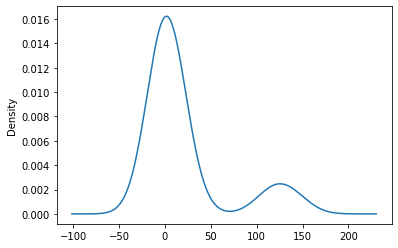

In [351]:
model_sarima_fit.resid.plot(kind="kde")

In [352]:
test_data["pred_SARIMA"]=sarima_pred

2024-03-17 12:30:18,666 [48212] WARNING  py.warnings:109: [JupyterRequire] C:\Users\Gaurav Pathak\AppData\Local\Temp\ipykernel_48212\2080165802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["pred_SARIMA"]=sarima_pred



<AxesSubplot: xlabel='Month'>

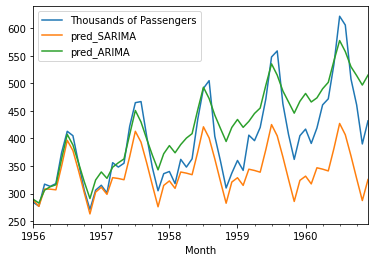

In [353]:
test_data[["Thousands of Passengers","pred_SARIMA","pred_ARIMA"]].plot()